In [3]:
!pip install caer canaro

     |████████████████████████████████| 838 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 56.3 MB 67.9 MB/s eta 0:00:01
     |████████████████████████████████| 21.6 MB 20.1 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [48]:
import os
import caer
import cv2 as cv
import numpy as np
import gc  # for garbage collection
import canaro

In [49]:
# resizing all the data to be same sized
IMG_SIZE = (80, 80)
channels = 1
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'

In [50]:
# creating a dictionary to save all folders name which are inside the bade folder
# then saving the total no. of photos inside them into the dictionary
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

# sorting dictionary in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [51]:
# saving the first ten character of dictionary into list
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count > 10:
        break

characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten',
 'chief_wiggum']

In [52]:
# create training data
# it will go through every path inside char_path and will look at every element inside characters
# so for example firstly it will search for the homer_simpson into the dataset and 
# then go through all the images that are inside the homer_simpson folder.

# training set is actually consist of two list image array and corresponding labels
# here labels are index of the characters list
train = caer.preprocess_from_dir(char_path, characters, channels = channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
1 - homer_simpson
2 - homer_simpson
3 - homer_simpson
4 - homer_simpson
5 - homer_simpson
6 - homer_simpson
7 - homer_simpson
8 - homer_simpson
9 - homer_simpson
10 - homer_simpson
11 - homer_simpson
12 - homer_simpson
13 - homer_simpson
14 - homer_simpson
15 - homer_simpson
16 - homer_simpson
17 - homer_simpson
18 - homer_simpson
19 - homer_simpson
20 - homer_simpson
21 - homer_simpson
22 - homer_simpson
23 - homer_simpson
24 - homer_simpson
25 - homer_simpson
26 - homer_simpson
27 - homer_simpson
28 - homer_simpson
29 - homer_simpson
30 - homer_simpson
31 - homer_simpson
32 - homer_simpson
33 - homer_simpson
34 - homer_simpson
35 - homer_simpson
36 - homer_simpson
37 - homer_simpson
38 - homer_simpson
39 - homer_simpson
40 - homer_simpson
41 - homer_simpson
42 - homer_simpson
43 - homer_simpson
44 - homer_simpson
45 - homer_simpson
46 - homer_simpson
47 - homer_simps

449 - homer_simpson
450 - homer_simpson
451 - homer_simpson
452 - homer_simpson
453 - homer_simpson
454 - homer_simpson
455 - homer_simpson
456 - homer_simpson
457 - homer_simpson
458 - homer_simpson
459 - homer_simpson
460 - homer_simpson
461 - homer_simpson
462 - homer_simpson
463 - homer_simpson
464 - homer_simpson
465 - homer_simpson
466 - homer_simpson
467 - homer_simpson
468 - homer_simpson
469 - homer_simpson
470 - homer_simpson
471 - homer_simpson
472 - homer_simpson
473 - homer_simpson
474 - homer_simpson
475 - homer_simpson
476 - homer_simpson
477 - homer_simpson
478 - homer_simpson
479 - homer_simpson
480 - homer_simpson
481 - homer_simpson
482 - homer_simpson
483 - homer_simpson
484 - homer_simpson
485 - homer_simpson
486 - homer_simpson
487 - homer_simpson
488 - homer_simpson
489 - homer_simpson
490 - homer_simpson
491 - homer_simpson
492 - homer_simpson
493 - homer_simpson
494 - homer_simpson
495 - homer_simpson
496 - homer_simpson
497 - homer_simpson
498 - homer_simpson


896 - homer_simpson
897 - homer_simpson
898 - homer_simpson
899 - homer_simpson
900 - homer_simpson
901 - homer_simpson
902 - homer_simpson
903 - homer_simpson
904 - homer_simpson
905 - homer_simpson
906 - homer_simpson
907 - homer_simpson
908 - homer_simpson
909 - homer_simpson
910 - homer_simpson
911 - homer_simpson
912 - homer_simpson
913 - homer_simpson
914 - homer_simpson
915 - homer_simpson
916 - homer_simpson
917 - homer_simpson
918 - homer_simpson
919 - homer_simpson
920 - homer_simpson
921 - homer_simpson
922 - homer_simpson
923 - homer_simpson
924 - homer_simpson
925 - homer_simpson
926 - homer_simpson
927 - homer_simpson
928 - homer_simpson
929 - homer_simpson
930 - homer_simpson
931 - homer_simpson
932 - homer_simpson
933 - homer_simpson
934 - homer_simpson
935 - homer_simpson
936 - homer_simpson
937 - homer_simpson
938 - homer_simpson
939 - homer_simpson
940 - homer_simpson
941 - homer_simpson
942 - homer_simpson
943 - homer_simpson
944 - homer_simpson
945 - homer_simpson


1340 - homer_simpson
1341 - homer_simpson
1342 - homer_simpson
1343 - homer_simpson
1344 - homer_simpson
1345 - homer_simpson
1346 - homer_simpson
1347 - homer_simpson
1348 - homer_simpson
1349 - homer_simpson
1350 - homer_simpson
1351 - homer_simpson
1352 - homer_simpson
1353 - homer_simpson
1354 - homer_simpson
1355 - homer_simpson
1356 - homer_simpson
1357 - homer_simpson
1358 - homer_simpson
1359 - homer_simpson
1360 - homer_simpson
1361 - homer_simpson
1362 - homer_simpson
1363 - homer_simpson
1364 - homer_simpson
1365 - homer_simpson
1366 - homer_simpson
1367 - homer_simpson
1368 - homer_simpson
1369 - homer_simpson
1370 - homer_simpson
1371 - homer_simpson
1372 - homer_simpson
1373 - homer_simpson
1374 - homer_simpson
1375 - homer_simpson
1376 - homer_simpson
1377 - homer_simpson
1378 - homer_simpson
1379 - homer_simpson
1380 - homer_simpson
1381 - homer_simpson
1382 - homer_simpson
1383 - homer_simpson
1384 - homer_simpson
1385 - homer_simpson
1386 - homer_simpson
1387 - homer_

1741 - homer_simpson
1742 - homer_simpson
1743 - homer_simpson
1744 - homer_simpson
1745 - homer_simpson
1746 - homer_simpson
1747 - homer_simpson
1748 - homer_simpson
1749 - homer_simpson
1750 - homer_simpson
1751 - homer_simpson
1752 - homer_simpson
1753 - homer_simpson
1754 - homer_simpson
1755 - homer_simpson
1756 - homer_simpson
1757 - homer_simpson
1758 - homer_simpson
1759 - homer_simpson
1760 - homer_simpson
1761 - homer_simpson
1762 - homer_simpson
1763 - homer_simpson
1764 - homer_simpson
1765 - homer_simpson
1766 - homer_simpson
1767 - homer_simpson
1768 - homer_simpson
1769 - homer_simpson
1770 - homer_simpson
1771 - homer_simpson
1772 - homer_simpson
1773 - homer_simpson
1774 - homer_simpson
1775 - homer_simpson
1776 - homer_simpson
1777 - homer_simpson
1778 - homer_simpson
1779 - homer_simpson
1780 - homer_simpson
1781 - homer_simpson
1782 - homer_simpson
1783 - homer_simpson
1784 - homer_simpson
1785 - homer_simpson
1786 - homer_simpson
1787 - homer_simpson
1788 - homer_

2175 - homer_simpson
2176 - homer_simpson
2177 - homer_simpson
2178 - homer_simpson
2179 - homer_simpson
2180 - homer_simpson
2181 - homer_simpson
2182 - homer_simpson
2183 - homer_simpson
2184 - homer_simpson
2185 - homer_simpson
2186 - homer_simpson
2187 - homer_simpson
2188 - homer_simpson
2189 - homer_simpson
2190 - homer_simpson
2191 - homer_simpson
2192 - homer_simpson
2193 - homer_simpson
2194 - homer_simpson
2195 - homer_simpson
2196 - homer_simpson
2197 - homer_simpson
2198 - homer_simpson
2199 - homer_simpson
2200 - homer_simpson
2201 - homer_simpson
2202 - homer_simpson
2203 - homer_simpson
2204 - homer_simpson
2205 - homer_simpson
2206 - homer_simpson
2207 - homer_simpson
2208 - homer_simpson
2209 - homer_simpson
2210 - homer_simpson
2211 - homer_simpson
2212 - homer_simpson
2213 - homer_simpson
2214 - homer_simpson
2215 - homer_simpson
2216 - homer_simpson
2217 - homer_simpson
2218 - homer_simpson
2219 - homer_simpson
2220 - homer_simpson
2221 - homer_simpson
2222 - homer_

399 - ned_flanders
400 - ned_flanders
401 - ned_flanders
402 - ned_flanders
403 - ned_flanders
404 - ned_flanders
405 - ned_flanders
406 - ned_flanders
407 - ned_flanders
408 - ned_flanders
409 - ned_flanders
410 - ned_flanders
411 - ned_flanders
412 - ned_flanders
413 - ned_flanders
414 - ned_flanders
415 - ned_flanders
416 - ned_flanders
417 - ned_flanders
418 - ned_flanders
419 - ned_flanders
420 - ned_flanders
421 - ned_flanders
422 - ned_flanders
423 - ned_flanders
424 - ned_flanders
425 - ned_flanders
426 - ned_flanders
427 - ned_flanders
428 - ned_flanders
429 - ned_flanders
430 - ned_flanders
431 - ned_flanders
432 - ned_flanders
433 - ned_flanders
434 - ned_flanders
435 - ned_flanders
436 - ned_flanders
437 - ned_flanders
438 - ned_flanders
439 - ned_flanders
440 - ned_flanders
441 - ned_flanders
442 - ned_flanders
443 - ned_flanders
444 - ned_flanders
445 - ned_flanders
446 - ned_flanders
447 - ned_flanders
448 - ned_flanders
449 - ned_flanders
450 - ned_flanders
451 - ned_fl

876 - ned_flanders
877 - ned_flanders
878 - ned_flanders
879 - ned_flanders
880 - ned_flanders
881 - ned_flanders
882 - ned_flanders
883 - ned_flanders
884 - ned_flanders
885 - ned_flanders
886 - ned_flanders
887 - ned_flanders
888 - ned_flanders
889 - ned_flanders
890 - ned_flanders
891 - ned_flanders
892 - ned_flanders
893 - ned_flanders
894 - ned_flanders
895 - ned_flanders
896 - ned_flanders
897 - ned_flanders
898 - ned_flanders
899 - ned_flanders
900 - ned_flanders
901 - ned_flanders
902 - ned_flanders
903 - ned_flanders
904 - ned_flanders
905 - ned_flanders
906 - ned_flanders
907 - ned_flanders
908 - ned_flanders
909 - ned_flanders
910 - ned_flanders
911 - ned_flanders
912 - ned_flanders
913 - ned_flanders
914 - ned_flanders
915 - ned_flanders
916 - ned_flanders
917 - ned_flanders
918 - ned_flanders
919 - ned_flanders
920 - ned_flanders
921 - ned_flanders
922 - ned_flanders
923 - ned_flanders
924 - ned_flanders
925 - ned_flanders
926 - ned_flanders
927 - ned_flanders
928 - ned_fl

1293 - ned_flanders
1294 - ned_flanders
1295 - ned_flanders
1296 - ned_flanders
1297 - ned_flanders
1298 - ned_flanders
1299 - ned_flanders
1300 - ned_flanders
1301 - ned_flanders
1302 - ned_flanders
1303 - ned_flanders
1304 - ned_flanders
1305 - ned_flanders
1306 - ned_flanders
1307 - ned_flanders
1308 - ned_flanders
1309 - ned_flanders
1310 - ned_flanders
1311 - ned_flanders
1312 - ned_flanders
1313 - ned_flanders
1314 - ned_flanders
1315 - ned_flanders
1316 - ned_flanders
1317 - ned_flanders
1318 - ned_flanders
1319 - ned_flanders
1320 - ned_flanders
1321 - ned_flanders
1322 - ned_flanders
1323 - ned_flanders
1324 - ned_flanders
1325 - ned_flanders
1326 - ned_flanders
1327 - ned_flanders
1328 - ned_flanders
1329 - ned_flanders
1330 - ned_flanders
1331 - ned_flanders
1332 - ned_flanders
1333 - ned_flanders
1334 - ned_flanders
1335 - ned_flanders
1336 - ned_flanders
1337 - ned_flanders
1338 - ned_flanders
1339 - ned_flanders
1340 - ned_flanders
1341 - ned_flanders
1342 - ned_flanders


291 - moe_szyslak
292 - moe_szyslak
293 - moe_szyslak
294 - moe_szyslak
295 - moe_szyslak
296 - moe_szyslak
297 - moe_szyslak
298 - moe_szyslak
299 - moe_szyslak
300 - moe_szyslak
301 - moe_szyslak
302 - moe_szyslak
303 - moe_szyslak
304 - moe_szyslak
305 - moe_szyslak
306 - moe_szyslak
307 - moe_szyslak
308 - moe_szyslak
309 - moe_szyslak
310 - moe_szyslak
311 - moe_szyslak
312 - moe_szyslak
313 - moe_szyslak
314 - moe_szyslak
315 - moe_szyslak
316 - moe_szyslak
317 - moe_szyslak
318 - moe_szyslak
319 - moe_szyslak
320 - moe_szyslak
321 - moe_szyslak
322 - moe_szyslak
323 - moe_szyslak
324 - moe_szyslak
325 - moe_szyslak
326 - moe_szyslak
327 - moe_szyslak
328 - moe_szyslak
329 - moe_szyslak
330 - moe_szyslak
331 - moe_szyslak
332 - moe_szyslak
333 - moe_szyslak
334 - moe_szyslak
335 - moe_szyslak
336 - moe_szyslak
337 - moe_szyslak
338 - moe_szyslak
339 - moe_szyslak
340 - moe_szyslak
341 - moe_szyslak
342 - moe_szyslak
343 - moe_szyslak
344 - moe_szyslak
345 - moe_szyslak
346 - moe_

764 - moe_szyslak
765 - moe_szyslak
766 - moe_szyslak
767 - moe_szyslak
768 - moe_szyslak
769 - moe_szyslak
770 - moe_szyslak
771 - moe_szyslak
772 - moe_szyslak
773 - moe_szyslak
774 - moe_szyslak
775 - moe_szyslak
776 - moe_szyslak
777 - moe_szyslak
778 - moe_szyslak
779 - moe_szyslak
780 - moe_szyslak
781 - moe_szyslak
782 - moe_szyslak
783 - moe_szyslak
784 - moe_szyslak
785 - moe_szyslak
786 - moe_szyslak
787 - moe_szyslak
788 - moe_szyslak
789 - moe_szyslak
790 - moe_szyslak
791 - moe_szyslak
792 - moe_szyslak
793 - moe_szyslak
794 - moe_szyslak
795 - moe_szyslak
796 - moe_szyslak
797 - moe_szyslak
798 - moe_szyslak
799 - moe_szyslak
800 - moe_szyslak
801 - moe_szyslak
802 - moe_szyslak
803 - moe_szyslak
804 - moe_szyslak
805 - moe_szyslak
806 - moe_szyslak
807 - moe_szyslak
808 - moe_szyslak
809 - moe_szyslak
810 - moe_szyslak
811 - moe_szyslak
812 - moe_szyslak
813 - moe_szyslak
814 - moe_szyslak
815 - moe_szyslak
816 - moe_szyslak
817 - moe_szyslak
818 - moe_szyslak
819 - moe_

1254 - moe_szyslak
1255 - moe_szyslak
1256 - moe_szyslak
1257 - moe_szyslak
1258 - moe_szyslak
1259 - moe_szyslak
1260 - moe_szyslak
1261 - moe_szyslak
1262 - moe_szyslak
1263 - moe_szyslak
1264 - moe_szyslak
1265 - moe_szyslak
1266 - moe_szyslak
1267 - moe_szyslak
1268 - moe_szyslak
1269 - moe_szyslak
1270 - moe_szyslak
1271 - moe_szyslak
1272 - moe_szyslak
1273 - moe_szyslak
1274 - moe_szyslak
1275 - moe_szyslak
1276 - moe_szyslak
1277 - moe_szyslak
1278 - moe_szyslak
1279 - moe_szyslak
1280 - moe_szyslak
1281 - moe_szyslak
1282 - moe_szyslak
1283 - moe_szyslak
1284 - moe_szyslak
1285 - moe_szyslak
1286 - moe_szyslak
1287 - moe_szyslak
1288 - moe_szyslak
1289 - moe_szyslak
1290 - moe_szyslak
1291 - moe_szyslak
1292 - moe_szyslak
1293 - moe_szyslak
1294 - moe_szyslak
1295 - moe_szyslak
1296 - moe_szyslak
1297 - moe_szyslak
1298 - moe_szyslak
1299 - moe_szyslak
1300 - moe_szyslak
1301 - moe_szyslak
1302 - moe_szyslak
1303 - moe_szyslak
1304 - moe_szyslak
1305 - moe_szyslak
1306 - moe_s

260 - lisa_simpson
261 - lisa_simpson
262 - lisa_simpson
263 - lisa_simpson
264 - lisa_simpson
265 - lisa_simpson
266 - lisa_simpson
267 - lisa_simpson
268 - lisa_simpson
269 - lisa_simpson
270 - lisa_simpson
271 - lisa_simpson
272 - lisa_simpson
273 - lisa_simpson
274 - lisa_simpson
275 - lisa_simpson
276 - lisa_simpson
277 - lisa_simpson
278 - lisa_simpson
279 - lisa_simpson
280 - lisa_simpson
281 - lisa_simpson
282 - lisa_simpson
283 - lisa_simpson
284 - lisa_simpson
285 - lisa_simpson
286 - lisa_simpson
287 - lisa_simpson
288 - lisa_simpson
289 - lisa_simpson
290 - lisa_simpson
291 - lisa_simpson
292 - lisa_simpson
293 - lisa_simpson
294 - lisa_simpson
295 - lisa_simpson
296 - lisa_simpson
297 - lisa_simpson
298 - lisa_simpson
299 - lisa_simpson
300 - lisa_simpson
301 - lisa_simpson
302 - lisa_simpson
303 - lisa_simpson
304 - lisa_simpson
305 - lisa_simpson
306 - lisa_simpson
307 - lisa_simpson
308 - lisa_simpson
309 - lisa_simpson
310 - lisa_simpson
311 - lisa_simpson
312 - lisa_s

730 - lisa_simpson
731 - lisa_simpson
732 - lisa_simpson
733 - lisa_simpson
734 - lisa_simpson
735 - lisa_simpson
736 - lisa_simpson
737 - lisa_simpson
738 - lisa_simpson
739 - lisa_simpson
740 - lisa_simpson
741 - lisa_simpson
742 - lisa_simpson
743 - lisa_simpson
744 - lisa_simpson
745 - lisa_simpson
746 - lisa_simpson
747 - lisa_simpson
748 - lisa_simpson
749 - lisa_simpson
750 - lisa_simpson
751 - lisa_simpson
752 - lisa_simpson
753 - lisa_simpson
754 - lisa_simpson
755 - lisa_simpson
756 - lisa_simpson
757 - lisa_simpson
758 - lisa_simpson
759 - lisa_simpson
760 - lisa_simpson
761 - lisa_simpson
762 - lisa_simpson
763 - lisa_simpson
764 - lisa_simpson
765 - lisa_simpson
766 - lisa_simpson
767 - lisa_simpson
768 - lisa_simpson
769 - lisa_simpson
770 - lisa_simpson
771 - lisa_simpson
772 - lisa_simpson
773 - lisa_simpson
774 - lisa_simpson
775 - lisa_simpson
776 - lisa_simpson
777 - lisa_simpson
778 - lisa_simpson
779 - lisa_simpson
780 - lisa_simpson
781 - lisa_simpson
782 - lisa_s

1176 - lisa_simpson
1177 - lisa_simpson
1178 - lisa_simpson
1179 - lisa_simpson
1180 - lisa_simpson
1181 - lisa_simpson
1182 - lisa_simpson
1183 - lisa_simpson
1184 - lisa_simpson
1185 - lisa_simpson
1186 - lisa_simpson
1187 - lisa_simpson
1188 - lisa_simpson
1189 - lisa_simpson
1190 - lisa_simpson
1191 - lisa_simpson
1192 - lisa_simpson
1193 - lisa_simpson
1194 - lisa_simpson
1195 - lisa_simpson
1196 - lisa_simpson
1197 - lisa_simpson
1198 - lisa_simpson
1199 - lisa_simpson
1200 - lisa_simpson
1201 - lisa_simpson
1202 - lisa_simpson
1203 - lisa_simpson
1204 - lisa_simpson
1205 - lisa_simpson
1206 - lisa_simpson
1207 - lisa_simpson
1208 - lisa_simpson
1209 - lisa_simpson
1210 - lisa_simpson
1211 - lisa_simpson
1212 - lisa_simpson
1213 - lisa_simpson
1214 - lisa_simpson
1215 - lisa_simpson
1216 - lisa_simpson
1217 - lisa_simpson
1218 - lisa_simpson
1219 - lisa_simpson
1220 - lisa_simpson
1221 - lisa_simpson
1222 - lisa_simpson
1223 - lisa_simpson
1224 - lisa_simpson
1225 - lisa_simpson


300 - bart_simpson
301 - bart_simpson
302 - bart_simpson
303 - bart_simpson
304 - bart_simpson
305 - bart_simpson
306 - bart_simpson
307 - bart_simpson
308 - bart_simpson
309 - bart_simpson
310 - bart_simpson
311 - bart_simpson
312 - bart_simpson
313 - bart_simpson
314 - bart_simpson
315 - bart_simpson
316 - bart_simpson
317 - bart_simpson
318 - bart_simpson
319 - bart_simpson
320 - bart_simpson
321 - bart_simpson
322 - bart_simpson
323 - bart_simpson
324 - bart_simpson
325 - bart_simpson
326 - bart_simpson
327 - bart_simpson
328 - bart_simpson
329 - bart_simpson
330 - bart_simpson
331 - bart_simpson
332 - bart_simpson
333 - bart_simpson
334 - bart_simpson
335 - bart_simpson
336 - bart_simpson
337 - bart_simpson
338 - bart_simpson
339 - bart_simpson
340 - bart_simpson
341 - bart_simpson
342 - bart_simpson
343 - bart_simpson
344 - bart_simpson
345 - bart_simpson
346 - bart_simpson
347 - bart_simpson
348 - bart_simpson
349 - bart_simpson
350 - bart_simpson
351 - bart_simpson
352 - bart_s

773 - bart_simpson
774 - bart_simpson
775 - bart_simpson
776 - bart_simpson
777 - bart_simpson
778 - bart_simpson
779 - bart_simpson
780 - bart_simpson
781 - bart_simpson
782 - bart_simpson
783 - bart_simpson
784 - bart_simpson
785 - bart_simpson
786 - bart_simpson
787 - bart_simpson
788 - bart_simpson
789 - bart_simpson
790 - bart_simpson
791 - bart_simpson
792 - bart_simpson
793 - bart_simpson
794 - bart_simpson
795 - bart_simpson
796 - bart_simpson
797 - bart_simpson
798 - bart_simpson
799 - bart_simpson
800 - bart_simpson
801 - bart_simpson
802 - bart_simpson
803 - bart_simpson
804 - bart_simpson
805 - bart_simpson
806 - bart_simpson
807 - bart_simpson
808 - bart_simpson
809 - bart_simpson
810 - bart_simpson
811 - bart_simpson
812 - bart_simpson
813 - bart_simpson
814 - bart_simpson
815 - bart_simpson
816 - bart_simpson
817 - bart_simpson
818 - bart_simpson
819 - bart_simpson
820 - bart_simpson
821 - bart_simpson
822 - bart_simpson
823 - bart_simpson
824 - bart_simpson
825 - bart_s

1235 - bart_simpson
1236 - bart_simpson
1237 - bart_simpson
1238 - bart_simpson
1239 - bart_simpson
1240 - bart_simpson
1241 - bart_simpson
1242 - bart_simpson
1243 - bart_simpson
1244 - bart_simpson
1245 - bart_simpson
1246 - bart_simpson
1247 - bart_simpson
1248 - bart_simpson
1249 - bart_simpson
1250 - bart_simpson
1251 - bart_simpson
1252 - bart_simpson
1253 - bart_simpson
1254 - bart_simpson
1255 - bart_simpson
1256 - bart_simpson
1257 - bart_simpson
1258 - bart_simpson
1259 - bart_simpson
1260 - bart_simpson
1261 - bart_simpson
1262 - bart_simpson
1263 - bart_simpson
1264 - bart_simpson
1265 - bart_simpson
1266 - bart_simpson
1267 - bart_simpson
1268 - bart_simpson
1269 - bart_simpson
1270 - bart_simpson
1271 - bart_simpson
1272 - bart_simpson
1273 - bart_simpson
1274 - bart_simpson
1275 - bart_simpson
1276 - bart_simpson
1277 - bart_simpson
1278 - bart_simpson
1279 - bart_simpson
1280 - bart_simpson
1281 - bart_simpson
1282 - bart_simpson
1283 - bart_simpson
1284 - bart_simpson


323 - marge_simpson
324 - marge_simpson
325 - marge_simpson
326 - marge_simpson
327 - marge_simpson
328 - marge_simpson
329 - marge_simpson
330 - marge_simpson
331 - marge_simpson
332 - marge_simpson
333 - marge_simpson
334 - marge_simpson
335 - marge_simpson
336 - marge_simpson
337 - marge_simpson
338 - marge_simpson
339 - marge_simpson
340 - marge_simpson
341 - marge_simpson
342 - marge_simpson
343 - marge_simpson
344 - marge_simpson
345 - marge_simpson
346 - marge_simpson
347 - marge_simpson
348 - marge_simpson
349 - marge_simpson
350 - marge_simpson
351 - marge_simpson
352 - marge_simpson
353 - marge_simpson
354 - marge_simpson
355 - marge_simpson
356 - marge_simpson
357 - marge_simpson
358 - marge_simpson
359 - marge_simpson
360 - marge_simpson
361 - marge_simpson
362 - marge_simpson
363 - marge_simpson
364 - marge_simpson
365 - marge_simpson
366 - marge_simpson
367 - marge_simpson
368 - marge_simpson
369 - marge_simpson
370 - marge_simpson
371 - marge_simpson
372 - marge_simpson


750 - marge_simpson
751 - marge_simpson
752 - marge_simpson
753 - marge_simpson
754 - marge_simpson
755 - marge_simpson
756 - marge_simpson
757 - marge_simpson
758 - marge_simpson
759 - marge_simpson
760 - marge_simpson
761 - marge_simpson
762 - marge_simpson
763 - marge_simpson
764 - marge_simpson
765 - marge_simpson
766 - marge_simpson
767 - marge_simpson
768 - marge_simpson
769 - marge_simpson
770 - marge_simpson
771 - marge_simpson
772 - marge_simpson
773 - marge_simpson
774 - marge_simpson
775 - marge_simpson
776 - marge_simpson
777 - marge_simpson
778 - marge_simpson
779 - marge_simpson
780 - marge_simpson
781 - marge_simpson
782 - marge_simpson
783 - marge_simpson
784 - marge_simpson
785 - marge_simpson
786 - marge_simpson
787 - marge_simpson
788 - marge_simpson
789 - marge_simpson
790 - marge_simpson
791 - marge_simpson
792 - marge_simpson
793 - marge_simpson
794 - marge_simpson
795 - marge_simpson
796 - marge_simpson
797 - marge_simpson
798 - marge_simpson
799 - marge_simpson


1154 - marge_simpson
1155 - marge_simpson
1156 - marge_simpson
1157 - marge_simpson
1158 - marge_simpson
1159 - marge_simpson
1160 - marge_simpson
1161 - marge_simpson
1162 - marge_simpson
1163 - marge_simpson
1164 - marge_simpson
1165 - marge_simpson
1166 - marge_simpson
1167 - marge_simpson
1168 - marge_simpson
1169 - marge_simpson
1170 - marge_simpson
1171 - marge_simpson
1172 - marge_simpson
1173 - marge_simpson
1174 - marge_simpson
1175 - marge_simpson
1176 - marge_simpson
1177 - marge_simpson
1178 - marge_simpson
1179 - marge_simpson
1180 - marge_simpson
1181 - marge_simpson
1182 - marge_simpson
1183 - marge_simpson
1184 - marge_simpson
1185 - marge_simpson
1186 - marge_simpson
1187 - marge_simpson
1188 - marge_simpson
1189 - marge_simpson
1190 - marge_simpson
1191 - marge_simpson
1192 - marge_simpson
1193 - marge_simpson
1194 - marge_simpson
1195 - marge_simpson
1196 - marge_simpson
1197 - marge_simpson
1198 - marge_simpson
1199 - marge_simpson
1200 - marge_simpson
1201 - marge_

274 - krusty_the_clown
275 - krusty_the_clown
276 - krusty_the_clown
277 - krusty_the_clown
278 - krusty_the_clown
279 - krusty_the_clown
280 - krusty_the_clown
281 - krusty_the_clown
282 - krusty_the_clown
283 - krusty_the_clown
284 - krusty_the_clown
285 - krusty_the_clown
286 - krusty_the_clown
287 - krusty_the_clown
288 - krusty_the_clown
289 - krusty_the_clown
290 - krusty_the_clown
291 - krusty_the_clown
292 - krusty_the_clown
293 - krusty_the_clown
294 - krusty_the_clown
295 - krusty_the_clown
296 - krusty_the_clown
297 - krusty_the_clown
298 - krusty_the_clown
299 - krusty_the_clown
300 - krusty_the_clown
301 - krusty_the_clown
302 - krusty_the_clown
303 - krusty_the_clown
304 - krusty_the_clown
305 - krusty_the_clown
306 - krusty_the_clown
307 - krusty_the_clown
308 - krusty_the_clown
309 - krusty_the_clown
310 - krusty_the_clown
311 - krusty_the_clown
312 - krusty_the_clown
313 - krusty_the_clown
314 - krusty_the_clown
315 - krusty_the_clown
316 - krusty_the_clown
317 - krust

645 - krusty_the_clown
646 - krusty_the_clown
647 - krusty_the_clown
648 - krusty_the_clown
649 - krusty_the_clown
650 - krusty_the_clown
651 - krusty_the_clown
652 - krusty_the_clown
653 - krusty_the_clown
654 - krusty_the_clown
655 - krusty_the_clown
656 - krusty_the_clown
657 - krusty_the_clown
658 - krusty_the_clown
659 - krusty_the_clown
660 - krusty_the_clown
661 - krusty_the_clown
662 - krusty_the_clown
663 - krusty_the_clown
664 - krusty_the_clown
665 - krusty_the_clown
666 - krusty_the_clown
667 - krusty_the_clown
668 - krusty_the_clown
669 - krusty_the_clown
670 - krusty_the_clown
671 - krusty_the_clown
672 - krusty_the_clown
673 - krusty_the_clown
674 - krusty_the_clown
675 - krusty_the_clown
676 - krusty_the_clown
677 - krusty_the_clown
678 - krusty_the_clown
679 - krusty_the_clown
680 - krusty_the_clown
681 - krusty_the_clown
682 - krusty_the_clown
683 - krusty_the_clown
684 - krusty_the_clown
685 - krusty_the_clown
686 - krusty_the_clown
687 - krusty_the_clown
688 - krust

1015 - krusty_the_clown
1016 - krusty_the_clown
1017 - krusty_the_clown
1018 - krusty_the_clown
1019 - krusty_the_clown
1020 - krusty_the_clown
1021 - krusty_the_clown
1022 - krusty_the_clown
1023 - krusty_the_clown
1024 - krusty_the_clown
1025 - krusty_the_clown
1026 - krusty_the_clown
1027 - krusty_the_clown
1028 - krusty_the_clown
1029 - krusty_the_clown
1030 - krusty_the_clown
1031 - krusty_the_clown
1032 - krusty_the_clown
1033 - krusty_the_clown
1034 - krusty_the_clown
1035 - krusty_the_clown
1036 - krusty_the_clown
1037 - krusty_the_clown
1038 - krusty_the_clown
1039 - krusty_the_clown
1040 - krusty_the_clown
1041 - krusty_the_clown
1042 - krusty_the_clown
1043 - krusty_the_clown
1044 - krusty_the_clown
1045 - krusty_the_clown
1046 - krusty_the_clown
1047 - krusty_the_clown
1048 - krusty_the_clown
1049 - krusty_the_clown
1050 - krusty_the_clown
1051 - krusty_the_clown
1052 - krusty_the_clown
1053 - krusty_the_clown
1054 - krusty_the_clown
1055 - krusty_the_clown
1056 - krusty_th

161 - principal_skinner
162 - principal_skinner
163 - principal_skinner
164 - principal_skinner
165 - principal_skinner
166 - principal_skinner
167 - principal_skinner
168 - principal_skinner
169 - principal_skinner
170 - principal_skinner
171 - principal_skinner
172 - principal_skinner
173 - principal_skinner
174 - principal_skinner
175 - principal_skinner
176 - principal_skinner
177 - principal_skinner
178 - principal_skinner
179 - principal_skinner
180 - principal_skinner
181 - principal_skinner
182 - principal_skinner
183 - principal_skinner
184 - principal_skinner
185 - principal_skinner
186 - principal_skinner
187 - principal_skinner
188 - principal_skinner
189 - principal_skinner
190 - principal_skinner
191 - principal_skinner
192 - principal_skinner
193 - principal_skinner
194 - principal_skinner
195 - principal_skinner
196 - principal_skinner
197 - principal_skinner
198 - principal_skinner
199 - principal_skinner
200 - principal_skinner
201 - principal_skinner
202 - principal_

541 - principal_skinner
542 - principal_skinner
543 - principal_skinner
544 - principal_skinner
545 - principal_skinner
546 - principal_skinner
547 - principal_skinner
548 - principal_skinner
549 - principal_skinner
550 - principal_skinner
551 - principal_skinner
552 - principal_skinner
553 - principal_skinner
554 - principal_skinner
555 - principal_skinner
556 - principal_skinner
557 - principal_skinner
558 - principal_skinner
559 - principal_skinner
560 - principal_skinner
561 - principal_skinner
562 - principal_skinner
563 - principal_skinner
564 - principal_skinner
565 - principal_skinner
566 - principal_skinner
567 - principal_skinner
568 - principal_skinner
569 - principal_skinner
570 - principal_skinner
571 - principal_skinner
572 - principal_skinner
573 - principal_skinner
574 - principal_skinner
575 - principal_skinner
576 - principal_skinner
577 - principal_skinner
578 - principal_skinner
579 - principal_skinner
580 - principal_skinner
581 - principal_skinner
582 - principal_

914 - principal_skinner
915 - principal_skinner
916 - principal_skinner
917 - principal_skinner
918 - principal_skinner
919 - principal_skinner
920 - principal_skinner
921 - principal_skinner
922 - principal_skinner
923 - principal_skinner
924 - principal_skinner
925 - principal_skinner
926 - principal_skinner
927 - principal_skinner
928 - principal_skinner
929 - principal_skinner
930 - principal_skinner
931 - principal_skinner
932 - principal_skinner
933 - principal_skinner
934 - principal_skinner
935 - principal_skinner
936 - principal_skinner
937 - principal_skinner
938 - principal_skinner
939 - principal_skinner
940 - principal_skinner
941 - principal_skinner
942 - principal_skinner
943 - principal_skinner
944 - principal_skinner
945 - principal_skinner
946 - principal_skinner
947 - principal_skinner
948 - principal_skinner
949 - principal_skinner
950 - principal_skinner
951 - principal_skinner
952 - principal_skinner
953 - principal_skinner
954 - principal_skinner
955 - principal_

56 - charles_montgomery_burns
57 - charles_montgomery_burns
58 - charles_montgomery_burns
59 - charles_montgomery_burns
60 - charles_montgomery_burns
61 - charles_montgomery_burns
62 - charles_montgomery_burns
63 - charles_montgomery_burns
64 - charles_montgomery_burns
65 - charles_montgomery_burns
66 - charles_montgomery_burns
67 - charles_montgomery_burns
68 - charles_montgomery_burns
69 - charles_montgomery_burns
70 - charles_montgomery_burns
71 - charles_montgomery_burns
72 - charles_montgomery_burns
73 - charles_montgomery_burns
74 - charles_montgomery_burns
75 - charles_montgomery_burns
76 - charles_montgomery_burns
77 - charles_montgomery_burns
78 - charles_montgomery_burns
79 - charles_montgomery_burns
80 - charles_montgomery_burns
81 - charles_montgomery_burns
82 - charles_montgomery_burns
83 - charles_montgomery_burns
84 - charles_montgomery_burns
85 - charles_montgomery_burns
86 - charles_montgomery_burns
87 - charles_montgomery_burns
88 - charles_montgomery_burns
89 - charl

365 - charles_montgomery_burns
366 - charles_montgomery_burns
367 - charles_montgomery_burns
368 - charles_montgomery_burns
369 - charles_montgomery_burns
370 - charles_montgomery_burns
371 - charles_montgomery_burns
372 - charles_montgomery_burns
373 - charles_montgomery_burns
374 - charles_montgomery_burns
375 - charles_montgomery_burns
376 - charles_montgomery_burns
377 - charles_montgomery_burns
378 - charles_montgomery_burns
379 - charles_montgomery_burns
380 - charles_montgomery_burns
381 - charles_montgomery_burns
382 - charles_montgomery_burns
383 - charles_montgomery_burns
384 - charles_montgomery_burns
385 - charles_montgomery_burns
386 - charles_montgomery_burns
387 - charles_montgomery_burns
388 - charles_montgomery_burns
389 - charles_montgomery_burns
390 - charles_montgomery_burns
391 - charles_montgomery_burns
392 - charles_montgomery_burns
393 - charles_montgomery_burns
394 - charles_montgomery_burns
395 - charles_montgomery_burns
396 - charles_montgomery_burns
397 - ch

635 - charles_montgomery_burns
636 - charles_montgomery_burns
637 - charles_montgomery_burns
638 - charles_montgomery_burns
639 - charles_montgomery_burns
640 - charles_montgomery_burns
641 - charles_montgomery_burns
642 - charles_montgomery_burns
643 - charles_montgomery_burns
644 - charles_montgomery_burns
645 - charles_montgomery_burns
646 - charles_montgomery_burns
647 - charles_montgomery_burns
648 - charles_montgomery_burns
649 - charles_montgomery_burns
650 - charles_montgomery_burns
651 - charles_montgomery_burns
652 - charles_montgomery_burns
653 - charles_montgomery_burns
654 - charles_montgomery_burns
655 - charles_montgomery_burns
656 - charles_montgomery_burns
657 - charles_montgomery_burns
658 - charles_montgomery_burns
659 - charles_montgomery_burns
660 - charles_montgomery_burns
661 - charles_montgomery_burns
662 - charles_montgomery_burns
663 - charles_montgomery_burns
664 - charles_montgomery_burns
665 - charles_montgomery_burns
666 - charles_montgomery_burns
667 - ch

914 - charles_montgomery_burns
915 - charles_montgomery_burns
916 - charles_montgomery_burns
917 - charles_montgomery_burns
918 - charles_montgomery_burns
919 - charles_montgomery_burns
920 - charles_montgomery_burns
921 - charles_montgomery_burns
922 - charles_montgomery_burns
923 - charles_montgomery_burns
924 - charles_montgomery_burns
925 - charles_montgomery_burns
926 - charles_montgomery_burns
927 - charles_montgomery_burns
928 - charles_montgomery_burns
929 - charles_montgomery_burns
930 - charles_montgomery_burns
931 - charles_montgomery_burns
932 - charles_montgomery_burns
933 - charles_montgomery_burns
934 - charles_montgomery_burns
935 - charles_montgomery_burns
936 - charles_montgomery_burns
937 - charles_montgomery_burns
938 - charles_montgomery_burns
939 - charles_montgomery_burns
940 - charles_montgomery_burns
941 - charles_montgomery_burns
942 - charles_montgomery_burns
943 - charles_montgomery_burns
944 - charles_montgomery_burns
945 - charles_montgomery_burns
946 - ch

1 - milhouse_van_houten
2 - milhouse_van_houten
3 - milhouse_van_houten
4 - milhouse_van_houten
5 - milhouse_van_houten
6 - milhouse_van_houten
7 - milhouse_van_houten
8 - milhouse_van_houten
9 - milhouse_van_houten
10 - milhouse_van_houten
11 - milhouse_van_houten
12 - milhouse_van_houten
13 - milhouse_van_houten
14 - milhouse_van_houten
15 - milhouse_van_houten
16 - milhouse_van_houten
17 - milhouse_van_houten
18 - milhouse_van_houten
19 - milhouse_van_houten
20 - milhouse_van_houten
21 - milhouse_van_houten
22 - milhouse_van_houten
23 - milhouse_van_houten
24 - milhouse_van_houten
25 - milhouse_van_houten
26 - milhouse_van_houten
27 - milhouse_van_houten
28 - milhouse_van_houten
29 - milhouse_van_houten
30 - milhouse_van_houten
31 - milhouse_van_houten
32 - milhouse_van_houten
33 - milhouse_van_houten
34 - milhouse_van_houten
35 - milhouse_van_houten
36 - milhouse_van_houten
37 - milhouse_van_houten
38 - milhouse_van_houten
39 - milhouse_van_houten
40 - milhouse_van_houten
41 - milh

323 - milhouse_van_houten
324 - milhouse_van_houten
325 - milhouse_van_houten
326 - milhouse_van_houten
327 - milhouse_van_houten
328 - milhouse_van_houten
329 - milhouse_van_houten
330 - milhouse_van_houten
331 - milhouse_van_houten
332 - milhouse_van_houten
333 - milhouse_van_houten
334 - milhouse_van_houten
335 - milhouse_van_houten
336 - milhouse_van_houten
337 - milhouse_van_houten
338 - milhouse_van_houten
339 - milhouse_van_houten
340 - milhouse_van_houten
341 - milhouse_van_houten
342 - milhouse_van_houten
343 - milhouse_van_houten
344 - milhouse_van_houten
345 - milhouse_van_houten
346 - milhouse_van_houten
347 - milhouse_van_houten
348 - milhouse_van_houten
349 - milhouse_van_houten
350 - milhouse_van_houten
351 - milhouse_van_houten
352 - milhouse_van_houten
353 - milhouse_van_houten
354 - milhouse_van_houten
355 - milhouse_van_houten
356 - milhouse_van_houten
357 - milhouse_van_houten
358 - milhouse_van_houten
359 - milhouse_van_houten
360 - milhouse_van_houten
361 - milhou

641 - milhouse_van_houten
642 - milhouse_van_houten
643 - milhouse_van_houten
644 - milhouse_van_houten
645 - milhouse_van_houten
646 - milhouse_van_houten
647 - milhouse_van_houten
648 - milhouse_van_houten
649 - milhouse_van_houten
650 - milhouse_van_houten
651 - milhouse_van_houten
652 - milhouse_van_houten
653 - milhouse_van_houten
654 - milhouse_van_houten
655 - milhouse_van_houten
656 - milhouse_van_houten
657 - milhouse_van_houten
658 - milhouse_van_houten
659 - milhouse_van_houten
660 - milhouse_van_houten
661 - milhouse_van_houten
662 - milhouse_van_houten
663 - milhouse_van_houten
664 - milhouse_van_houten
665 - milhouse_van_houten
666 - milhouse_van_houten
667 - milhouse_van_houten
668 - milhouse_van_houten
669 - milhouse_van_houten
670 - milhouse_van_houten
671 - milhouse_van_houten
672 - milhouse_van_houten
673 - milhouse_van_houten
674 - milhouse_van_houten
675 - milhouse_van_houten
676 - milhouse_van_houten
677 - milhouse_van_houten
678 - milhouse_van_houten
679 - milhou

957 - milhouse_van_houten
958 - milhouse_van_houten
959 - milhouse_van_houten
960 - milhouse_van_houten
961 - milhouse_van_houten
962 - milhouse_van_houten
963 - milhouse_van_houten
964 - milhouse_van_houten
965 - milhouse_van_houten
966 - milhouse_van_houten
967 - milhouse_van_houten
968 - milhouse_van_houten
969 - milhouse_van_houten
970 - milhouse_van_houten
971 - milhouse_van_houten
972 - milhouse_van_houten
973 - milhouse_van_houten
974 - milhouse_van_houten
975 - milhouse_van_houten
976 - milhouse_van_houten
977 - milhouse_van_houten
978 - milhouse_van_houten
979 - milhouse_van_houten
980 - milhouse_van_houten
981 - milhouse_van_houten
982 - milhouse_van_houten
983 - milhouse_van_houten
984 - milhouse_van_houten
985 - milhouse_van_houten
986 - milhouse_van_houten
987 - milhouse_van_houten
988 - milhouse_van_houten
989 - milhouse_van_houten
990 - milhouse_van_houten
991 - milhouse_van_houten
992 - milhouse_van_houten
993 - milhouse_van_houten
994 - milhouse_van_houten
995 - milhou

286 - chief_wiggum
287 - chief_wiggum
288 - chief_wiggum
289 - chief_wiggum
290 - chief_wiggum
291 - chief_wiggum
292 - chief_wiggum
293 - chief_wiggum
294 - chief_wiggum
295 - chief_wiggum
296 - chief_wiggum
297 - chief_wiggum
298 - chief_wiggum
299 - chief_wiggum
300 - chief_wiggum
301 - chief_wiggum
302 - chief_wiggum
303 - chief_wiggum
304 - chief_wiggum
305 - chief_wiggum
306 - chief_wiggum
307 - chief_wiggum
308 - chief_wiggum
309 - chief_wiggum
310 - chief_wiggum
311 - chief_wiggum
312 - chief_wiggum
313 - chief_wiggum
314 - chief_wiggum
315 - chief_wiggum
316 - chief_wiggum
317 - chief_wiggum
318 - chief_wiggum
319 - chief_wiggum
320 - chief_wiggum
321 - chief_wiggum
322 - chief_wiggum
323 - chief_wiggum
324 - chief_wiggum
325 - chief_wiggum
326 - chief_wiggum
327 - chief_wiggum
328 - chief_wiggum
329 - chief_wiggum
330 - chief_wiggum
331 - chief_wiggum
332 - chief_wiggum
333 - chief_wiggum
334 - chief_wiggum
335 - chief_wiggum
336 - chief_wiggum
337 - chief_wiggum
338 - chief_

751 - chief_wiggum
752 - chief_wiggum
753 - chief_wiggum
754 - chief_wiggum
755 - chief_wiggum
756 - chief_wiggum
757 - chief_wiggum
758 - chief_wiggum
759 - chief_wiggum
760 - chief_wiggum
761 - chief_wiggum
762 - chief_wiggum
763 - chief_wiggum
764 - chief_wiggum
765 - chief_wiggum
766 - chief_wiggum
767 - chief_wiggum
768 - chief_wiggum
769 - chief_wiggum
770 - chief_wiggum
771 - chief_wiggum
772 - chief_wiggum
773 - chief_wiggum
774 - chief_wiggum
775 - chief_wiggum
776 - chief_wiggum
777 - chief_wiggum
778 - chief_wiggum
779 - chief_wiggum
780 - chief_wiggum
781 - chief_wiggum
782 - chief_wiggum
783 - chief_wiggum
784 - chief_wiggum
785 - chief_wiggum
786 - chief_wiggum
787 - chief_wiggum
788 - chief_wiggum
789 - chief_wiggum
790 - chief_wiggum
791 - chief_wiggum
792 - chief_wiggum
793 - chief_wiggum
794 - chief_wiggum
795 - chief_wiggum
796 - chief_wiggum
797 - chief_wiggum
798 - chief_wiggum
799 - chief_wiggum
800 - chief_wiggum
801 - chief_wiggum
802 - chief_wiggum
803 - chief_

In [53]:
len(train) # 14797 photos in the training set

14797

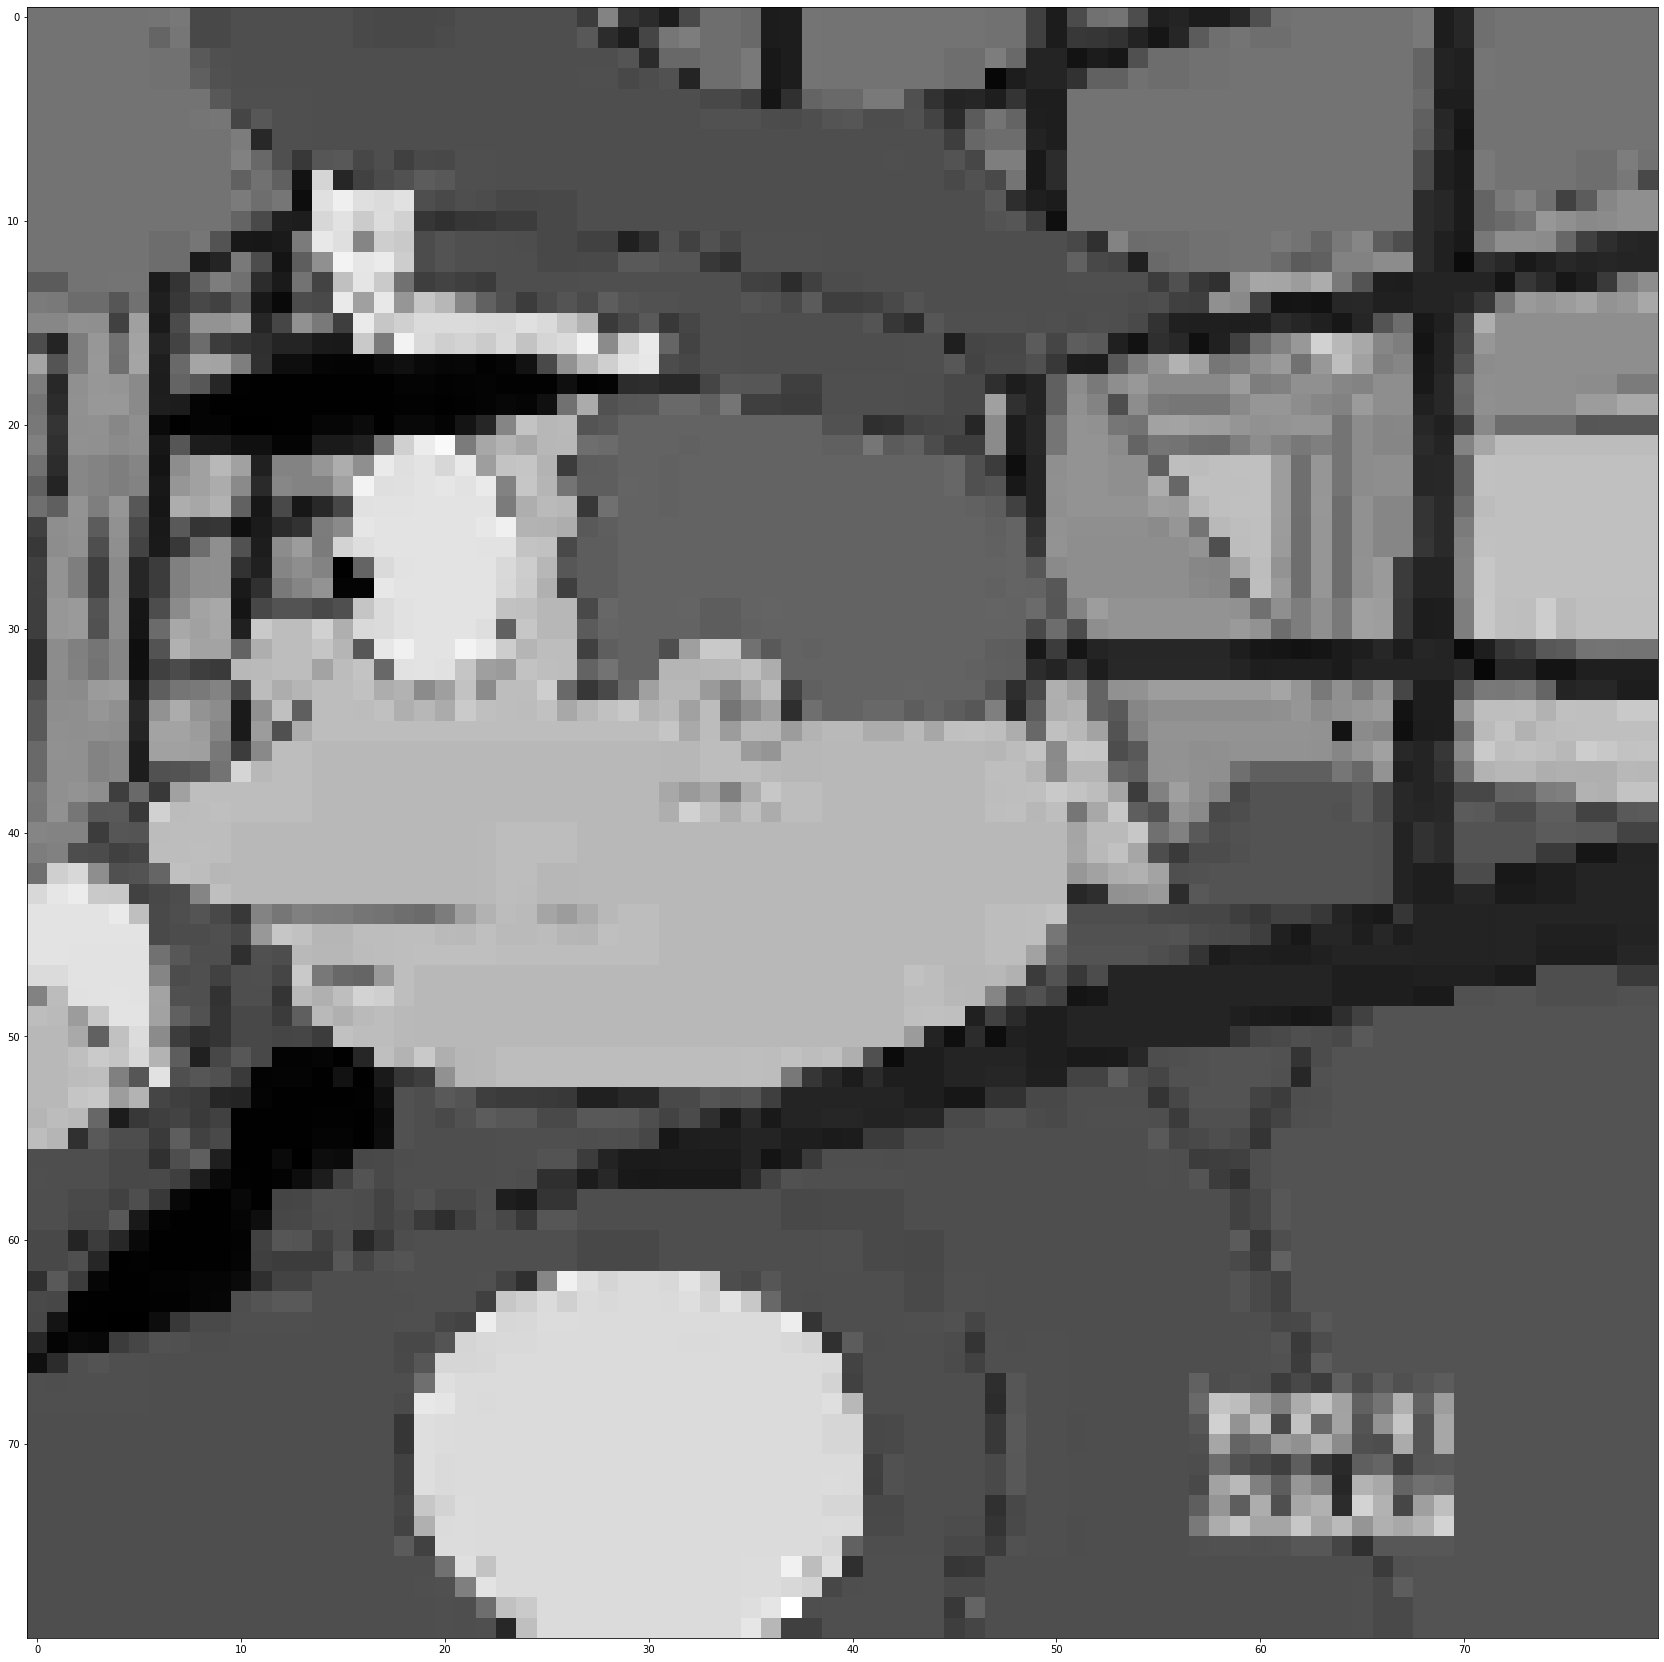

In [41]:
# visualization of the image
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0],cmap='gray')
plt.show()

In [54]:
# now we want to seperate the training set into features and labels
# and aslo reshape this featureSet into 4-Dimensional tensor So that can be fed into the model with no instruction
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [55]:
from tensorflow.keras.utils import to_categorical 
# Trying to normalize the data into the range of (0,1)
featureSet = caer.normalize(featureSet)
# convert integer labels into binary class vectors
labels = to_categorical(labels, len(characters))


In [60]:
# splitting the training data into training set and validation set
# val_ratio = 2 measns 80% data will be in training set and 20% in validation set
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)


In [61]:
del train 
del featureSet
del labels
gc.collect()

42

In [77]:
BATCH_SIZE = 32
EPOCHS = 10
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [78]:
# Image data generator
# this is basically image generator which will synthesise new images from already existing images 
# to help in introducing some randomness to a network and make it perform better
datagen = canaro.generators.imageDataGenerator()  # instance of the data generator from the keras libeary
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [79]:
# creating the model
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters),
                                          loss='binary_crossentropy', decay=1e-6, learning_rate=0.001, momentum= 0.9,
                                          nesterov=True)

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 64)       

In [81]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [82]:
training = model.fit(train_gen,
                     steps_per_epoch = len(x_train)//BATCH_SIZE,
                     epochs = EPOCHS,
                     validation_data = (x_val, y_val),
                     validation_steps = len(y_val)//BATCH_SIZE,
                     callbacks = callbacks_list)

Epoch 1/10
369/369 [==============================] - 12s 30ms/step - loss: 0.3777 - accuracy: 0.1294 - val_loss: 0.3123 - val_accuracy: 0.1533
Epoch 2/10
369/369 [==============================] - 10s 27ms/step - loss: 0.3036 - accuracy: 0.1415
Epoch 3/10
369/369 [==============================] - 10s 27ms/step - loss: 0.3033 - accuracy: 0.1460
Epoch 4/10
369/369 [==============================] - 10s 28ms/step - loss: 0.3021 - accuracy: 0.1454
Epoch 5/10
369/369 [==============================] - 10s 27ms/step - loss: 0.2937 - accuracy: 0.1857
Epoch 6/10
369/369 [==============================] - 10s 27ms/step - loss: 0.2850 - accuracy: 0.2251
Epoch 7/10
369/369 [==============================] - 10s 28ms/step - loss: 0.2838 - accuracy: 0.2291
Epoch 8/10
369/369 [==============================] - 9s 26ms/step - loss: 0.2815 - accuracy: 0.2502
Epoch 9/10
369/369 [==============================] - 10s 27ms/step - loss: 0.2787 - accuracy: 0.2619
Epoch 10/10
369/369 [====================

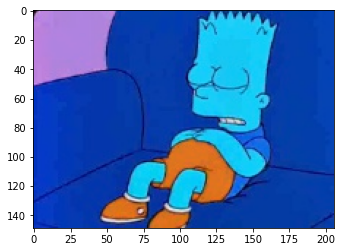

In [84]:
test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_10.jpg'
img = cv.imread(test_path)

plt.imshow(img, cmap='gray')
plt.show()

In [85]:
# to prepare a test image for testing by resizing and grayscaling
def prepare(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, IMG_SIZE)
    img = caer.reshape(img, IMG_SIZE, 1)
    return img

In [86]:
predictions = model.predict(prepare(img))

In [87]:
predictions

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [89]:
characters[np.argmax(predictions[0])]

'lisa_simpson'